#               Power Spectral Density (PSD)

This code is related to the following section of [the paper](https://arxiv.org/abs/2403.17181):

## Section III:  SIGNAL TRANSFORMATION AND ANALYSIS
### C. Power Spectral Density (PSD)

For more details please refer to [the paper](https://arxiv.org/abs/2403.17181).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import scipy
from scipy import signal
from scipy.signal import welch
plt.rc('font',family='Times New Roman')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load vibration signal:
vib_sig = loadtxt('vib.csv', delimiter=',') 
num_samples_vib = len(vib_sig) # number of datapoints in the signal.
fs_vib = 64000 # sampling rate
t_vib = np.arange(0.0, num_samples_vib, 1.0)/fs_vib # time vector.

#The vibration signal extracted from the Paderborn University (PU) dataset: https://mb.uni-paderborn.de/en/kat/main-research/datacenter/bearing-datacenter/data-sets-and-download

In [3]:
# PSD estimation using Welsh method:

seg_length =  num_samples_vib/4 # Segment length.
overlap = seg_length/2 # Overlap between successive segments = half segement length.
fft_length = 4096
win = 'hamming' # Segmentation window.
f_psd_w, psd_w = welch(vib_sig,  fs = fs_vib, window= win, nperseg= seg_length, noverlap= overlap, nfft= fft_length)


In [5]:
# PSD estimation using periodogram method:
f_psd_p, psd_p = signal.periodogram(vib_sig, fs_vib, window= win, nfft= fft_length)

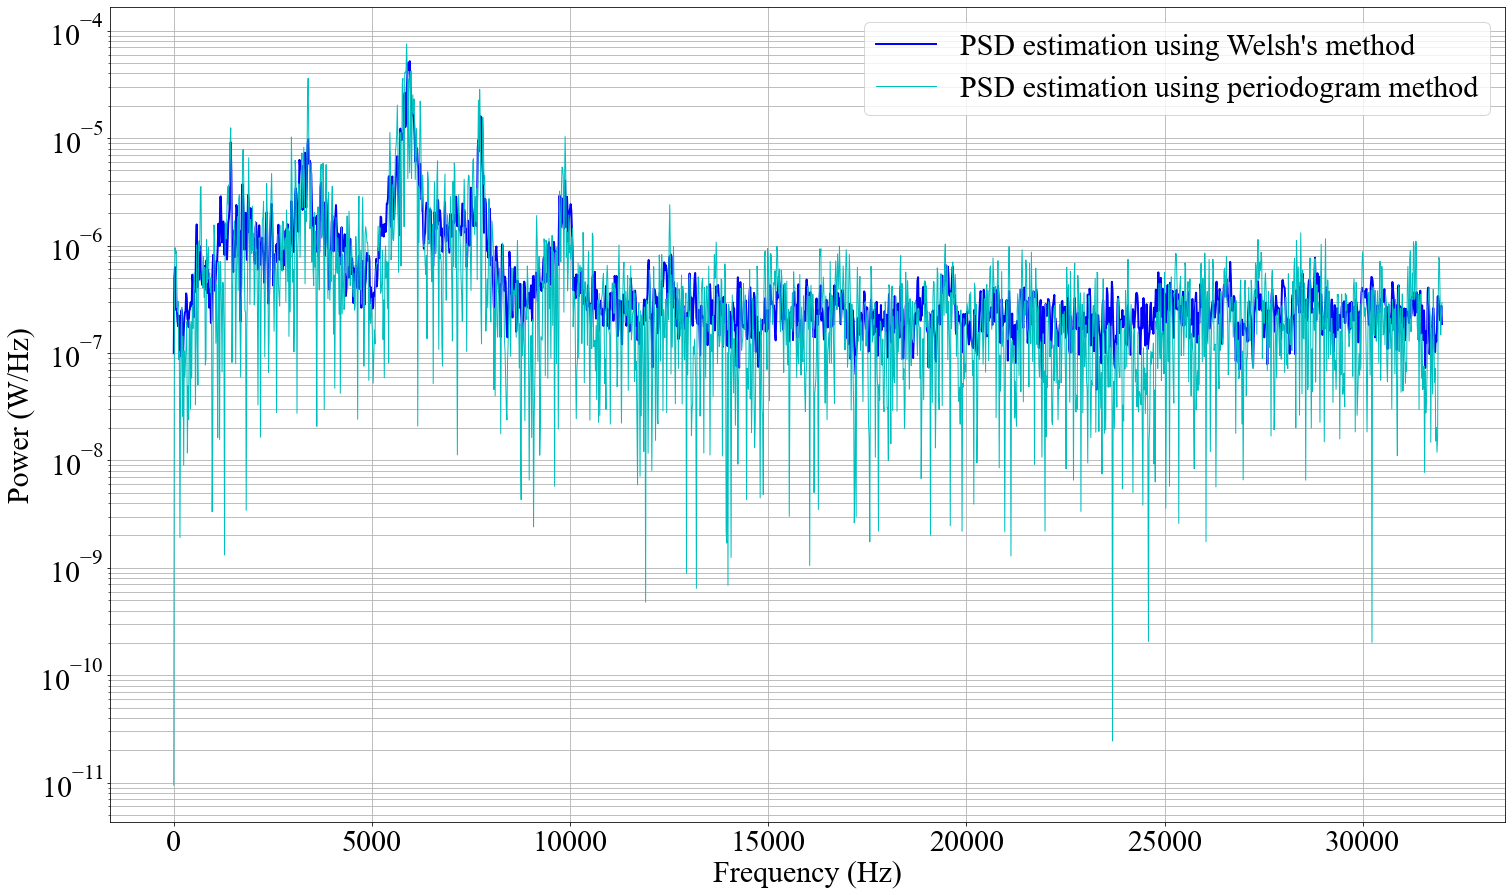

In [6]:
# Plot PSDs:

plt.figure(figsize=(25, 15))
plt.grid(True, which ="both")
plt.semilogy(f_psd_w, psd_w, linewidth=2, color='b', label = "PSD estimation using Welsh's method")
plt.semilogy(f_psd_p, psd_p, linewidth= 1, color='c',  label = "PSD estimation using periodogram method")
plt.xlabel('Frequency (Hz)', fontsize = 30)
plt.ylabel('Power (W/Hz)', fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize= 30)
plt.legend(fontsize=30)
plt.show()